In [56]:
import scipy.misc
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = plt.imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label

In [40]:
train_data, train_label = loadImages('./Q8_Dataset/emotion detection dateset/train')
x = (train_data - train_data.mean()) / train_data.std()
print(x.shape)

(154, 65536)


In [41]:
pca = PCA()
pca.fit(x)


# print(train_data_cov.shape)
# val, vec = np.linalg.eig(train_data_cov)
# val_sorted =  -np.sort(-val)
# print(val_sorted)

# vec_sorted = np.array([x for x, _ in sorted(zip(vec, val), key=lambda x: x[1])])


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)



[[ 0.0054336   0.00559236  0.0055649  ...  0.00122241  0.00130482
   0.00149479]
 [-0.00158406 -0.00136184 -0.0012749  ... -0.00061616 -0.00087385
  -0.00082845]
 [-0.00335762 -0.00317982 -0.00344016 ... -0.00409466 -0.00421453
  -0.00421477]
 ...
 [-0.00483374  0.00076893  0.00297993 ... -0.00312121  0.00184994
   0.00222964]
 [-0.00175734 -0.00034556  0.00223746 ... -0.00070846  0.0024596
  -0.0006304 ]
 [ 0.2467567   0.00647892  0.07753781 ...  0.00061528 -0.00037794
  -0.00068545]]
[5.12671029e+03 4.60529034e+03 3.38900233e+03 1.61654319e+03
 1.30610010e+03 1.01025950e+03 8.33975894e+02 6.87307982e+02
 5.49550935e+02 4.72446265e+02 4.15471065e+02 4.01972727e+02
 3.63371000e+02 3.22607173e+02 2.73721908e+02 2.28912245e+02
 2.10082743e+02 1.95674664e+02 1.85421937e+02 1.74313320e+02
 1.56319523e+02 1.52510145e+02 1.35587820e+02 1.30845586e+02
 1.20782130e+02 1.09994971e+02 1.08118372e+02 1.04072528e+02
 9.94848553e+01 9.38569114e+01 9.12624404e+01 8.76519947e+01
 8.51920291e+01 8.324

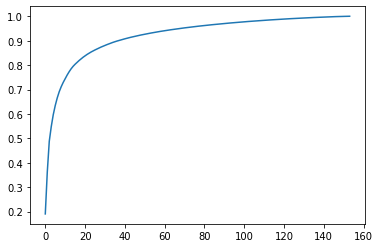

In [43]:
cnt = 0
vars = []
for percentage in pca.explained_variance_ratio_:
  cnt += percentage
  vars.append(cnt / pca.explained_variance_ratio_.sum())

plt.plot(vars)
plt.show()

20 components capture arround 90 percent of the variance however our training data is not that much so 10 dimensions is also good which captures 70 percent of the variance





In [44]:
print(vars[9])

0.7290107620954358


In [45]:
pca = PCA(n_components=4)
pca.fit(x)
x = pca.transform(x)
print(x.shape)
eigen_faces = pca.components_.reshape((4, 256, 256))


(154, 4)


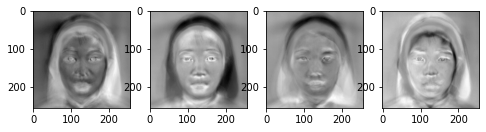

In [74]:
fig = plt.figure(figsize=(8, 8))
for cnt in range(4):
  fig.add_subplot(1, 4, cnt+1)
  plt.imshow(eigen_faces[cnt], cmap=plt.cm.binary)

plt.show()



These eigenfaces capture most of the varianve of the data therefore, they are enough to recosntruct all of the original data.

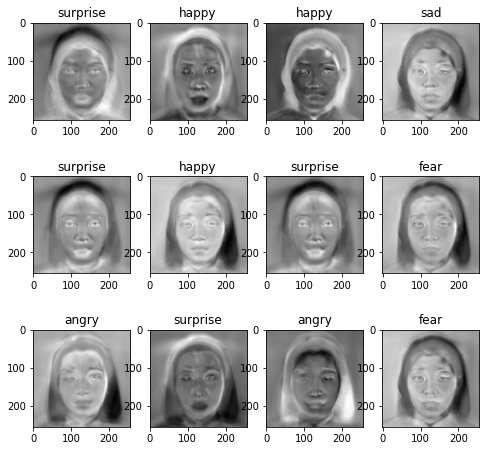

In [80]:
rec = np.matmul(x, pca.components_).reshape((x.shape[0], 256, 256)) 
fig = plt.figure(figsize=(8, 8))
for cnt in range(12):
  fig.add_subplot(3, 4, cnt+1)
  plt.imshow(rec[cnt], cmap=plt.cm.binary)
  plt.title(train_label[cnt])

plt.show()


These are the reconstructed version of the faces

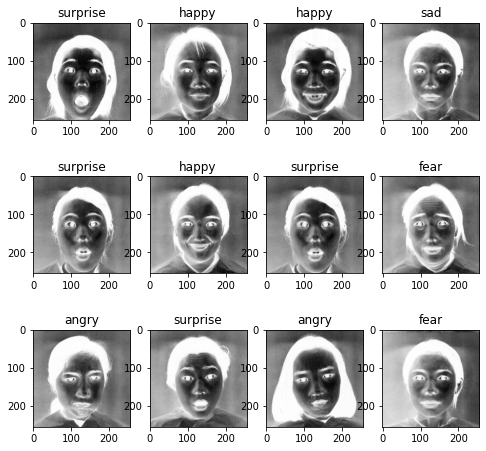

In [81]:
fig = plt.figure(figsize=(8, 8))
for cnt in range(12):
  fig.add_subplot(3, 4, cnt+1)
  plt.imshow(train_data[cnt].reshape((256, 256)), cmap=plt.cm.binary)
  plt.title(train_label[cnt])

plt.show()


These are the real faces

In [47]:
print(pca.explained_variance_)

[5126.71028871 4605.29034479 3389.00232597 1616.5431901 ]


In [57]:
knn_1 = KNeighborsClassifier(1)
knn_1.fit(x, train_label)
y_1 = knn_1.predict(x)

print(accuracy_score(train_label, y_1))


1.0


In [60]:
knn_2 = KNeighborsClassifier(2)
knn_2.fit(x, train_label)
y_2 = knn_2.predict(x)

print(accuracy_score(train_label, y_2))


0.7597402597402597
